# 2DG Perturbation Rep 1 - Analysing Skeletons
In this notebook we will use code shared by Allyson Quinn Ryan (Details Publication) to find the longest distance in the skeleton images:

C:\Users\savill\mambaforge-pypy3\envs\jesse_env\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


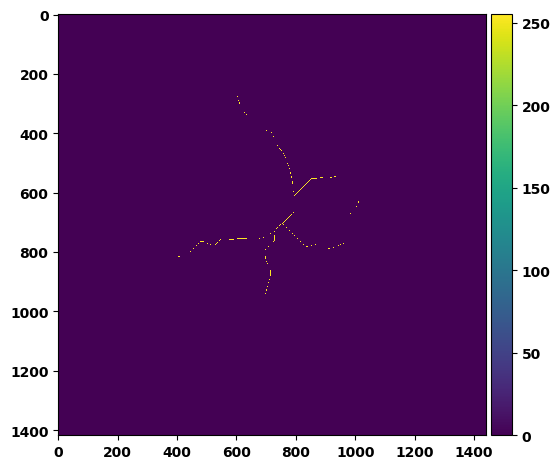

In [1]:
import os
import skimage.io as io
from __future__ import division, print_function

import os
import matplotlib.pyplot as plt
from skimage.io import imread, imsave

%matplotlib inline

from toska_functions import *

home_directory = r"C:\Users\savill\OneDrive\Documents\PhD Jesse\Embryonic_organoid_prediction\Processing dataset for Paper\TLS_2D_morphostate_investigation/"
path = home_directory + "image_data/Processed Data/Perturbation Analysis/Skeletons ROT Rep3/"

collection = io.imread_collection(path+"/*skeleton.tif")

io.imshow(collection[0])

Defining the function for extracting the longest distance along the skeleton and extracting it from all images

In [2]:
def find_spine_length(skeleton):
    coords, e_pts, b_pts, brnch, brnch_ids, brnch_lengths = n8_parse_skel_2d(skeleton.astype(bool), 0, 1)
    bp_img, n_bp = n8_relabel_brnch_pts(b_pts, brnch.shape, brnch.dtype)
    adj_mat = n8_adjacency_matrix(e_pts, bp_img, n_bp, brnch, len(brnch_ids))
    nodes, weighted_edges, G = skeleton_network(adj_mat, brnch_lengths)
    spine_path, spine_length = skeleton_spine_search(nodes, G)

    return spine_length[0]

find_spine_length(collection[1])

862

In [3]:
names = []
lengths = []
for skeleton, name in zip(collection,collection.files):
    name_short = os.path.split(name)[1][:-18]
    names.append(name_short)
    lengths.append(find_spine_length(skeleton))
    
lengths[:5]

[822, 862, 1460, 1460, 1487]

Making the dataframe and checking the data before saving it to disk

In [17]:
import pandas as pd
import organoid_prediction_python as opp

output_dataframe = pd.DataFrame({
    "File Name":names,
    "Skeleton Spine Length [pixels]":lengths
})

sample_ids = opp.extract_sample_identifiers(output_dataframe["File Name"],regex = '(?P<Time>.+)_(?P<Treatment>[0-9]{2})nM_.*',regex_column_names=["Time","Treatment"])
sample_ids["Treatment"] = ["ROT_" + treat + "_nM" for treat in sample_ids["Treatment"]]
output_dataframe = pd.concat([output_dataframe,sample_ids],axis=1).drop("Filename",axis=1)
output_dataframe

,File Name,Skeleton Spine Length [pixels],Time,Treatment
0,72h_10nM_R_P1_14_01,822,72h,ROT_10_nM
1,72h_10nM_R_P1_15_01,862,72h,ROT_10_nM
2,72h_10nM_R_P1_16_01,1460,72h,ROT_10_nM
3,72h_10nM_R_P1_17_01,1460,72h,ROT_10_nM
4,72h_10nM_R_P1_18_01,1487,72h,ROT_10_nM
...,...,...,...,...
292,Control_20nM_R_P2_118_01,1057,Control,ROT_20_nM
293,Control_20nM_R_P2_119_01,708,Control,ROT_20_nM
294,Control_20nM_R_P2_120_01,1420,Control,ROT_20_nM
295,Control_20nM_R_P2_121_01,962,Control,ROT_20_nM


<Axes: xlabel='Treatment', ylabel='Skeleton Spine Length [pixels]'>

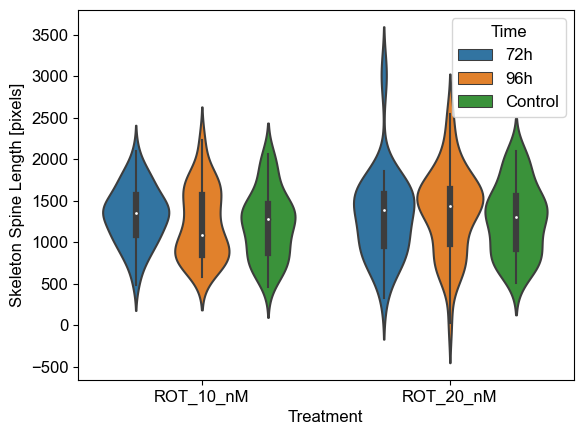

In [18]:
import seaborn as sns
sns.violinplot(output_dataframe,x="Treatment",y="Skeleton Spine Length [pixels]",hue="Time")

In [19]:
output_dataframe.to_csv(home_directory+"/tabular_data/Rot Rep 3 Spine Lengths.csv")